# Final Project - Stage 1
## Exploratory Data Analysis - Data Set Dana
## FD23-01 : Fraud Busters
**Group Member:**
- (ML) M118DKX4597 	- Dharma Setiawan
- (ML) M181DSX0383 	- Jeremy Reeve Kurniawan
- (ML) M181DSX0495 	- Muhammad Agil Ghifari
- (CC) C181DSX0615 	- Taufik Pragusga


### Import Libraries

In [ ]:
#Data and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import kendalltau
import plotly.express as px
from tabulate import tabulate
from sklearn.impute import SimpleImputer

<ipython-input-2-f089d30426db>:6: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import kendalltau


## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Import Data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Penjelasan variabel-variabel pada dataset**

No.	Column name	Description
1.		**uid** This is unique id for all users that appear on this dataset
2.		**is_scammer**	This is label for fraud detection, 1 means this user is scammer, 0 is non-scammer. Be aware that there some users can be 1 or 0, it depends on what source they are appeared to be their label.
3.		**source**	This is on what channel report is user verified as scammers or non-scammers.
4.	**trx_date**	This is the date of their last transactions
5.		**report_date**	This is the date when other users report this user conducting scam.
6.		**registereddate**	This the date the user register to application
7.		**birthday**	This is user’s birthday based on their certificate id.
8.		**gender**	This is user’s gender based on their certificate id.
9.		**job_position**	This is user’s job_position based on their certificate id.
10.		**is_verified**	This is terms to marks user either is verified as valid users or not, 1 means verified (kyc) 0 means non verified.
11.		**aqc_freq_prepaid_mobile**	This is total frequency of user buying prepaid_mobile all time
12.		**aqc_mean_prepaid_mobile_amount**	This is mean total amount of user buying prepaid_mobile all time
13.		**aqc_freq_topup**	This is total frequency of user’s topup transactions all time
14.		**aqc_freq_topup_within_7d**	This is total frequency of user doing topup within 7d before their last trx_date
15.		**aqc_mean_topup_amount**	This is mean total amount of user doing topup all time
16.		**aqc_mean_topup_amount_7d**	This is mean total amount of user doing topup within 7d before their last trx_date
17.		**aqc_mean_topup_amount_30d**	This is mean total amount of user doing topup within 30d before their last trx_date
18.		**aqc_mean_topup_amount_90d**	This is mean total amount of user doing topup within 90d before their last trx_date
19.		**aqc_total_topup_amount_7d**	This is sum total amount of user doing topup within 7d before their last trx_date
20.		**aqc_total_topup_amount_90d**	This is sum total amount of user doing topup within 90d before their last trx_date
21.		**aqc_freq_x2x**	This is total frequency of user’s x2x transactions all time
22.		**aqc_freq_x2x_within_60d**	This is total frequency of user’s x2x transactions within 60d before their trx_date
23.		**aqc_freq_x2x_within_90d**	This is total frequency of user’s x2x transactions within 90d before their trx_date
24.		**aqc_mean_x2x_amount**	This is mean total amount of user’s x2x transactions all time
25.		**aqc_mean_x2x_amount_7d**	This mean total amount of user’s x2x transactions within 7d before their trx_date
26.		**aqc_mean_x2x_amount_30d**	This mean total amount of user’s x2x transactions within 30d before their trx_date
27.		**aqc_mean_x2x_amount_60d**	This mean total amount of user’s x2x transactions within 60d before their trx_date
28.		**aqc_mean_x2x_amount_90d**	This mean total amount of user’s x2x transactions within 90d before their trx_date
29.		**aqc_total_x2x_amount**	This is sum total amount of user’s x2x transactions all time
30.		**aqc_total_x2x_amount_7d**	This is sum total amount of user’s x2x transactions within 7d before their trx_date
31.		**aqc_total_x2x_amount_30d**	This is sum total amount of user’s x2x transactions within 30d before their trx_date
32.		**aqc_total_x2x_amount_60d**	This is sum total amount of user’s x2x transactions within 60d before their trx_date
33.		**aqc_total_x2x_amount_90d**	This is sum total amount of user’s x2x transactions within 90d before their trx_date
34.		**dormancy_max_gmt_pay_diff_days**	This is max days of dormant account. Dormant account means this account is rarely use our app.
35.		**dormancy_mean_gmt_pay_diff_days**	This is mean days of dormant account
36.		**dormancy_count_trx**	This is total transaction of dormant account
37.		**kyc_total_failed**	This is number of times user’s failed to register as verified user (kyc)
38.		**kyc_total_revoked**	This is number of times user’s revoked after success to register as verified user (kyc)
39.		**avg_topup_weight_1**	This is average user topup frequency per latest month multiply by weight then added by second month topup frequency multiply by half weight of latest month, so on and so on until sixth month before the latest month of trx_date then divided by six
40.		**avg_x2x_weight_1**	This is average user x2x frequency per latest month multiply by weight, then added by second month x2x frequency multiply by half weight of latest month, so on and so on until sixth month before the latest month of trx_date then divided by six
41.		**avg_other_weight_1**	This is average user other transaction frequency (beside topup and x2x) per latest month multiply by weight, then added by second month other transaction frequency (beside topup and x2x) multiply by half weight of latest month, so on and so on until sixth month before the latest month of trx_date then divided by six
42.		**centrality_outdegree_p2p**	This is value of outdegree centrality of p2p transaction per user for the latest month
43.		**centrality_indegree_p2p**	This is value of indegree centrality of p2p transaction per user for the latest month
44.		**centrality_undirected_p2p**	This is value of undirected degree centrality of p2p transaction per user for the latest month
45.		**centrality_outdegree_sendmoney**	This is value of outdegree centrality of sendmoney transaction per user for the latest month


In [ ]:
pd.set_option('display.max_columns', None)
url_dataset = "/content/drive/MyDrive/fraud_detection_for_bangkit_final.csv"
df_fraud = pd.read_csv(url_dataset)
df_fraud.head()


uid  is_scammer  \
0  da41ba31-1fb7-4123-b4f5-49d3c93c407d           1   
1  39063101-67dc-4a30-8d3a-d16a388f5dbd           1   
2  74196a84-6b98-475a-b01d-a4eb22c4c015           1   
3  640d7332-34f5-45bd-8404-65f72417fadc           1   
4  640d7332-34f5-45bd-8404-65f72417fadc           1   

                         source    trx_date report_date registereddate  \
0  INCOMPLETE_CS_REPORT_SCAMMER  2023-02-10  2023-02-10        2022-10   
1  INCOMPLETE_CS_REPORT_SCAMMER  2023-02-07  2023-02-07        2023-01   
2  INCOMPLETE_CS_REPORT_SCAMMER  2023-01-16  2023-01-16        2022-12   
3             CS_REPORT_SCAMMER  2022-04-19  2022-04-21        2022-04   
4             CS_REPORT_SCAMMER  2022-04-19  2022-04-21        2022-04   

  birthday  gender           job_position  is_verified  \
0  01-1994  Female  MENGURUS RUMAH TANGGA            1   
1  04-2002    Male    PELAJAR / MAHASISWA            1   
2  04-1991    Male  BELUM / TIDAK BEKERJA            1   
3      NaN     NaN                    NaN            0   
4      NaN     NaN                    NaN            0   

   aqc_freq_prepaid_mobile  aqc_mean_prepaid_mobile_amount  aqc_freq_topup  \
0                        0                        0.000000              15   
1                        1                   222222.222222              29   
2                        0                        0.000000               3   
3                        0                        0.000000               4   
4                        0                        0.000000               4   

   aqc_freq_topup_within_7d  aqc_mean_topup_amount  aqc_mean_topup_amount_7d  \
0                         8           1.372869e+05              6.152914e+04   
1                        15           4.090556e+07              3.042222e+07   
2                         3           2.419355e+05              2.419355e+05   
3                         4           1.437500e+07              1.437500e+07   
4                         4           1.437500e+07              1.437500e+07   

   aqc_mean_topup_amount_30d  aqc_mean_topup_amount_90d  \
0               8.079987e+04               1.372869e+05   
1               4.090556e+07               4.090556e+07   
2               2.419355e+05               2.419355e+05   
3               1.437500e+07               1.437500e+07   
4               1.437500e+07               1.437500e+07   

   aqc_total_topup_amount_7d  aqc_total_topup_amount_90d  aqc_freq_x2x  \
0                   47931200                   106946500           762   
1                 2738000000                  3681500000            47   
2                   15000000                    15000000            40   
3                  115000000                   115000000             0   
4                  115000000                   115000000             0   

   aqc_freq_x2x_within_60d  aqc_freq_x2x_within_90d  aqc_mean_x2x_amount  \
0                      434                      762         2.566508e+07   
1                       47                       47         5.808222e+07   
2                       40                       40         1.928892e+08   
3                        0                        0         0.000000e+00   
4                        0                        0         0.000000e+00   

   aqc_mean_x2x_amount_7d  aqc_mean_x2x_amount_30d  aqc_mean_x2x_amount_60d  \
0            1.026714e+07             1.541515e+07             1.541515e+07   
1            4.131111e+07             5.808222e+07             5.808222e+07   
2            1.928892e+08             1.928892e+08             1.928892e+08   
3            0.000000e+00             0.000000e+00             0.000000e+00   
4            0.000000e+00             0.000000e+00             0.000000e+00   

   aqc_mean_x2x_amount_90d  aqc_total_x2x_amount  aqc_total_x2x_amount_7d  \
0             2.566508e+07           19993100000               7998100000   
1             5.808222e+07            5227400000               3718000000  

In [ ]:
# Filter data so that the source only come from the already defined channel
channel = ['INCOMPLETE_CS_REPORT_VICTIM', 'INCOMPLETE_CS_REPORT_SCAMMER', 'CS_REPORT_SCAMMER', 'CS_REPORT_VICTIM']
df_fraud = df_fraud[df_fraud['source'].apply(lambda x : x in channel)]
df_fraud['source'].value_counts()


CS_REPORT_SCAMMER               12577
CS_REPORT_VICTIM                11353
INCOMPLETE_CS_REPORT_VICTIM     10367
INCOMPLETE_CS_REPORT_SCAMMER     8562
Name: source, dtype: int64

# Descriptive Statistics

## Informasi general variabel-variabel pada data frame

In [ ]:
#Info semua variabel secara general
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42859 entries, 0 to 398331
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uid                              42859 non-null  object 
 1   is_scammer                       42859 non-null  int64  
 2   source                           42859 non-null  object 
 3   trx_date                         42859 non-null  object 
 4   report_date                      42859 non-null  object 
 5   registereddate                   42768 non-null  object 
 6   birthday                         36944 non-null  object 
 7   gender                           37233 non-null  object 
 8   job_position                     36944 non-null  object 
 9   is_verified                      42859 non-null  int64  
 10  aqc_freq_prepaid_mobile          42859 non-null  int64  
 11  aqc_mean_prepaid_mobile_amount   42859 non-null  float64
 12  aqc_freq_topup   

In [ ]:
#Cek missing value
df_fraud.isna().sum()

uid                                   0
is_scammer                            0
source                                0
trx_date                              0
report_date                           0
registereddate                       91
birthday                           5915
gender                             5626
job_position                       5915
is_verified                           0
aqc_freq_prepaid_mobile               0
aqc_mean_prepaid_mobile_amount        0
aqc_freq_topup                        0
aqc_freq_topup_within_7d              0
aqc_mean_topup_amount                 0
aqc_mean_topup_amount_7d              0
aqc_mean_topup_amount_30d             0
aqc_mean_topup_amount_90d             0
aqc_total_topup_amount_7d             0
aqc_total_topup_amount_90d            0
aqc_freq_x2x                          0
aqc_freq_x2x_within_60d               0
aqc_freq_x2x_within_90d               0
aqc_mean_x2x_amount                   0
aqc_mean_x2x_amount_7d                0


In [ ]:
#Cek data double
df_fraud.duplicated().sum()

73

- The data consists of 32832 rows and 45 columns.
- After the filtering, we remove 90% of the data and currently we have 42859 rows.
- There are several null values in the dataset. The highest missing value is on report date.
- There are 73 duplicated columns
- There are 44 independent features and 1 targeted variable (dependent variable).
- According to its type, there are 8 categoric features and 36 numeric features.
- There is one target variable, which is `is_scammer` that is numeric.

## Statistical Summary

In [ ]:
# membagi data berdasarkan type datanya
category = df_fraud.select_dtypes(include='object')
numerical = df_fraud.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['is_scammer', 'is_verified', 'aqc_freq_prepaid_mobile', 'aqc_mean_prepaid_mobile_amount', 'aqc_freq_topup', 'aqc_freq_topup_within_7d', 'aqc_mean_topup_amount', 'aqc_mean_topup_amount_7d', 'aqc_mean_topup_amount_30d', 'aqc_mean_topup_amount_90d', 'aqc_total_topup_amount_7d', 'aqc_total_topup_amount_90d', 'aqc_freq_x2x', 'aqc_freq_x2x_within_60d', 'aqc_freq_x2x_within_90d', 'aqc_mean_x2x_amount', 'aqc_mean_x2x_amount_7d', 'aqc_mean_x2x_amount_30d', 'aqc_mean_x2x_amount_60d', 'aqc_mean_x2x_amount_90d', 'aqc_total_x2x_amount', 'aqc_total_x2x_amount_7d', 'aqc_total_x2x_amount_30d', 'aqc_total_x2x_amount_60d', 'aqc_total_x2x_amount_90d', 'dormancy_max_gmt_pay_diff_days', 'dormancy_mean_gmt_pay_diff_days', 'dormancy_count_trx', 'kyc_total_failed', 'kyc_total_revoked', 'avg_topup_weight_1', 'avg_x2x_weight_1', 'avg_other_weight_1', 'centrality_outdegree_p2p', 'centrality_indegree_p2p', 'centrality_undirected_p2p', 'centrality_outdegree_sendmoney']
Data category:  ['uid', 'sour

In [ ]:
#Pengelompokkan variabel kategorik
df_fraud_cat = df_fraud[category_cols]
df_fraud_cat.head()

uid                        source  \
0  da41ba31-1fb7-4123-b4f5-49d3c93c407d  INCOMPLETE_CS_REPORT_SCAMMER   
1  39063101-67dc-4a30-8d3a-d16a388f5dbd  INCOMPLETE_CS_REPORT_SCAMMER   
2  74196a84-6b98-475a-b01d-a4eb22c4c015  INCOMPLETE_CS_REPORT_SCAMMER   
3  640d7332-34f5-45bd-8404-65f72417fadc             CS_REPORT_SCAMMER   
4  640d7332-34f5-45bd-8404-65f72417fadc             CS_REPORT_SCAMMER   

     trx_date report_date registereddate birthday  gender  \
0  2023-02-10  2023-02-10        2022-10  01-1994  Female   
1  2023-02-07  2023-02-07        2023-01  04-2002    Male   
2  2023-01-16  2023-01-16        2022-12  04-1991    Male   
3  2022-04-19  2022-04-21        2022-04      NaN     NaN   
4  2022-04-19  2022-04-21        2022-04      NaN     NaN   

            job_position  
0  MENGURUS RUMAH TANGGA  
1    PELAJAR / MAHASISWA  
2  BELUM / TIDAK BEKERJA  
3                    NaN  
4                    NaN

In [ ]:
#Pengelompokkan variabel numerik
df_fraud_num = df_fraud[numerical_cols]
df_fraud_num.head()

is_scammer  is_verified  aqc_freq_prepaid_mobile  \
0           1            1                        0   
1           1            1                        1   
2           1            1                        0   
3           1            0                        0   
4           1            0                        0   

   aqc_mean_prepaid_mobile_amount  aqc_freq_topup  aqc_freq_topup_within_7d  \
0                        0.000000              15                         8   
1                   222222.222222              29                        15   
2                        0.000000               3                         3   
3                        0.000000               4                         4   
4                        0.000000               4                         4   

   aqc_mean_topup_amount  aqc_mean_topup_amount_7d  aqc_mean_topup_amount_30d  \
0           1.372869e+05              6.152914e+04               8.079987e+04   
1           4.090556e+07              3.042222e+07               4.090556e+07   
2           2.419355e+05              2.419355e+05               2.419355e+05   
3           1.437500e+07              1.437500e+07               1.437500e+07   
4           1.437500e+07              1.437500e+07               1.437500e+07   

   aqc_mean_topup_amount_90d  aqc_total_topup_amount_7d  \
0               1.372869e+05                   47931200   
1               4.090556e+07                 2738000000   
2               2.419355e+05                   15000000   
3               1.437500e+07                  115000000   
4               1.437500e+07                  115000000   

   aqc_total_topup_amount_90d  aqc_freq_x2x  aqc_freq_x2x_within_60d  \
0                   106946500           762                      434   
1                  3681500000            47                       47   
2                    15000000            40                       40   
3                   115000000             0                        0   
4                   115000000             0                        0   

   aqc_freq_x2x_within_90d  aqc_mean_x2x_amount  aqc_mean_x2x_amount_7d  \
0                      762         2.566508e+07            1.026714e+07   
1                       47         5.808222e+07            4.131111e+07   
2                       40         1.928892e+08            1.928892e+08   
3                        0         0.000000e+00            0.000000e+00   
4                        0         0.000000e+00            0.000000e+00   

   aqc_mean_x2x_amount_30d  aqc_mean_x2x_amount_60d  aqc_mean_x2x_amount_90d  \
0             1.541515e+07             1.541515e+07             2.566508e+07   
1             5.808222e+07             5.808222e+07             5.808222e+07   
2             1.928892e+08             1.928892e+08             1.928892e+08   
3             0.000000e+00             0.000000e+00             0.000000e+00   
4             0.000000e+00             0.000000e+00             0.000000e+00   

   aqc_total_x2x_amount  aqc_total_x2x_amount_7d  aqc_total_x2x_amount_30d  \
0           19993100000               7998100000               12008400000   
1            5227400000               3718000000                5227400000   
2           11959127900              11959127900               11959127900   
3                     0                        0                         0   
4                     0                        0                         0   

   aqc_total_x2x_amount_60d  aqc_total_x2x_amount_90d  \
0               12008400000               19993100000   
1                5227400000                5227400000   
2               11959127900               11959127900   
3                         0                         0   
4                         0                         0   

   dormancy_max_gmt_pay_diff_days  dormancy_mean_gmt_pay_diff_days  \
0                            45.0                         0.110949   
1                             6.0     

### Variabel Kategorik

In [ ]:
#Rangkuman statistik variabel kategorik 
df_fraud_cat.describe()

uid             source    trx_date  \
count                                  42859              42859       42859   
unique                                 42775                  4         834   
top     21224163-910b-4568-95c9-317fe6b5b528  CS_REPORT_SCAMMER  2023-03-01   
freq                                       8              12577         460   

       report_date registereddate birthday gender         job_position  
count        42859          42768    36944  37233                36944  
unique         796             62      739      2                   83  
top     2023-01-03        2021-05  04-2003   Male  PELAJAR / MAHASISWA  
freq           544           2094      283  23727                16838

- All the variables contain low cardinalities (low number of unique values), already good.
- `source` that is being used is CS_REPORT_SCAMMER (~29.34%).
- Male dominates the data (63.72%).
- Pelajar/Mahasiswa dominates the`job_position` (45.57%).


### Variabel Numerik

In [ ]:
#Rangkuman statistik variabel numerik 
df_fraud_num.describe()

is_scammer   is_verified  aqc_freq_prepaid_mobile  \
count  42859.000000  42859.000000             42859.000000   
mean       0.493222      0.861896                25.062181   
std        0.499960      0.345013                63.111954   
min        0.000000      0.000000                 0.000000   
25%        0.000000      1.000000                 1.000000   
50%        0.000000      1.000000                 7.000000   
75%        1.000000      1.000000                26.000000   
max        1.000000      1.000000              4718.000000   

       aqc_mean_prepaid_mobile_amount  aqc_freq_topup  \
count                    4.285900e+04    42859.000000   
mean                     2.586403e+05      142.993747   
std                      1.808909e+06      263.406730   
min                      0.000000e+00        0.000000   
25%                      4.411123e+03       17.000000   
50%                      5.659749e+04       61.000000   
75%                      1.726800e+05      176.000000   
max                      1.000000e+08    24919.000000   

       aqc_freq_topup_within_7d  aqc_mean_topup_amount  \
count              42859.000000           4.285900e+04   
mean                  42.261369           9.304014e+06   
std                   94.695076           2.308285e+07   
min                    0.000000           0.000000e+00   
25%                    4.000000           1.835938e+06   
50%                   13.000000           3.714550e+06   
75%                   43.000000           7.900951e+06   
max                 3819.000000           7.644444e+08   

       aqc_mean_topup_amount_7d  aqc_mean_topup_amount_30d  \
count              4.285900e+04               4.285900e+04   
mean               5.226351e+06               6.147307e+06   
std                2.013716e+07               2.133765e+07   
min                0.000000e+00               0.000000e+00   
25%                2.834971e+05               4.936154e+05   
50%                1.071429e+06               1.524504e+06   
75%                3.260456e+06               4.117488e+06   
max                7.644444e+08               7.644444e+08   

       aqc_mean_topup_amount_90d  aqc_total_topup_amount_7d  \
count               4.285900e+04               4.285900e+04   
mean                7.234549e+06               1.077001e+09   
std                 2.215814e+07               2.773939e+09   
min                 0.000000e+00               0.000000e+00   
25%                 8.490880e+05               4.050000e+07   
50%                 2.191404e+06               2.300000e+08   
75%                 5.292801e+06               9.283090e+08   
max                 7.644444e+08               5.374929e+10   

       aqc_total_topup_amount_90d  aqc_freq_x2x  aqc_freq_x2x_within_60d  \
count                4.285900e+04  42859.000000             42859.000000   
mean                 1.676673e+09    218.512121                85.372104   
std                  3.298651e+09    513.447543               178.339216   
min                  0.000000e+00      0.000000                 0.000000   
25%                  1.000000e+08      9.000000                 4.000000   
50%                  5.097285e+08     64.000000                24.000000   
75%                  1.823306e+09    242.000000                91.000000   
max                  5.779948e+10  63346.000000              5350.000000   

       aqc_freq_x2x_within_90d  aqc_mean_x2x_amount  aqc_mean_x2x_amount_7d  \
count             42859.000000         4.285900e+04            4.285900e+04   
mean                119.039432         1.815470e+07            8.451350e+06   
std                 225.069893         5.486942e+07            3.139249e+07   
min                   0.000000         0.000000e+00            0.000000e+00   
25%                   6.000000         1.283283e+06            2.058712e+05   
50%                  37.000000         4.084122e+06            1.151069e+06   
75%                 134.000000         1.032548e

- Variabel `Customer_care_calls` dan `Cost_of_the_Product` sudah cukup simetrik distribusinya mendekati distribusi normal (mean dan median tidak berbeda jauh).
- Variabel `Discount_offered` pola persebarannya membentuk positively skewed (mean>median), sedangkan variabel `Weight_in_gms` membentuk negatively skewed (median>mean).
- Dilihat dari nilai min, max, median, dan mean, variabel `Prior_purchases` dan `Discount_offered` tampaknya memiliki nilai outlier di titik max.
- Disini terlihat bahwa variabel `Customer_rating` bisa juga dikategorikan sebagai variabel kategorikal, 1-5 merupakan kategori rating. Untuk analisis statistik deskriptif, lebih pas untuk melihat variabel `Customer_rating` ini sebagai variabel kategorik.

In [ ]:
#Melihat perbandingan data pada variabel `job_position`
df_fraud.groupby(['job_position']).agg({'uid' : ['count']})

uid
             count
job_position      
110             30
112              1
114              9
126              1
13             142
...            ...
WIRASWASTA    2811
WIRASWATA        1
WIRASWSASTA      1
WIRAWASTA        1
WIRSWASTA        1

[83 rows x 1 columns]

- We can see that the variable is not normal. There are several job position that redundant. The most unique pattern is that there are several people who input the number (110,112,114, etc.). This might be an indication of scammer.

### Target Variable

In [ ]:
#Rangkuman statistik targeted variabel (`Reached.on.Time_Y.N`)
df_fraud['is_scammer'].describe()

count    42859.000000
mean         0.493222
std          0.499960
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_scammer, dtype: float64

- Variabel ini adalah variabel boolean/binary bertipe integer, bisa juga dijadikan variabel kategorikal, 1 adalah pengantaran barang terlambat dan 0 adalah pengantaran barang tepat waktu. Untuk analisis statistik deskriptif, lebih pas untuk melihat variabel `Reached.on.Time_Y.N` ini sebagai variabel kategorik.

In [ ]:
#Melihat perbandingan data pada variabel `is_scammer`
df_fraud.groupby(['is_scammer']).agg({'uid' : ['count']})

uid
            count
is_scammer       
0           21720
1           21139

<Axes: xlabel='is_scammer', ylabel='count'>

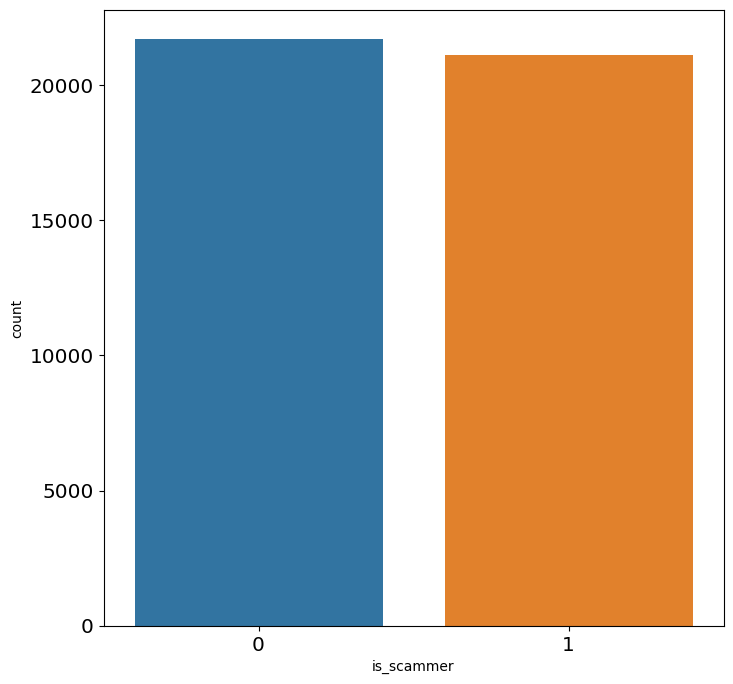

In [ ]:
# Countplot target variable visualization
plt.figure(figsize=(8, 8))
sns.countplot(x=df_fraud['is_scammer'], data=df_fraud)

- The data is balaced.

## Descriptive Statistics Summary
A. Are there any column with a weird data type?
> 

B. Are there any column who has null values? If yes, what is it? 
> Yes, there are several column that has null values. 

C. Are there any columns who the values are not matched? 
> The job position column has a weird values.

D. Are there any column who have weird summary values?


In [ ]:
df_fraud['is_scammer(cat)'] = np.where(df_fraud['is_scammer']==0, 'No', 'Yes')

In [ ]:
#Tampilan terbaru penamaan variabel
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42859 entries, 0 to 398331
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uid                              42859 non-null  object 
 1   is_scammer                       42859 non-null  int64  
 2   source                           42859 non-null  object 
 3   trx_date                         42859 non-null  object 
 4   report_date                      42859 non-null  object 
 5   registereddate                   42768 non-null  object 
 6   birthday                         36944 non-null  object 
 7   gender                           37233 non-null  object 
 8   job_position                     36944 non-null  object 
 9   is_verified                      42859 non-null  int64  
 10  aqc_freq_prepaid_mobile          42859 non-null  int64  
 11  aqc_mean_prepaid_mobile_amount   42859 non-null  float64
 12  aqc_freq_topup   

In [ ]:
df_fraud.head(5)

uid  is_scammer  \
0  da41ba31-1fb7-4123-b4f5-49d3c93c407d           1   
1  39063101-67dc-4a30-8d3a-d16a388f5dbd           1   
2  74196a84-6b98-475a-b01d-a4eb22c4c015           1   
3  640d7332-34f5-45bd-8404-65f72417fadc           1   
4  640d7332-34f5-45bd-8404-65f72417fadc           1   

                         source    trx_date report_date registereddate  \
0  INCOMPLETE_CS_REPORT_SCAMMER  2023-02-10  2023-02-10        2022-10   
1  INCOMPLETE_CS_REPORT_SCAMMER  2023-02-07  2023-02-07        2023-01   
2  INCOMPLETE_CS_REPORT_SCAMMER  2023-01-16  2023-01-16        2022-12   
3             CS_REPORT_SCAMMER  2022-04-19  2022-04-21        2022-04   
4             CS_REPORT_SCAMMER  2022-04-19  2022-04-21        2022-04   

  birthday  gender           job_position  is_verified  \
0  01-1994  Female  MENGURUS RUMAH TANGGA            1   
1  04-2002    Male    PELAJAR / MAHASISWA            1   
2  04-1991    Male  BELUM / TIDAK BEKERJA            1   
3      NaN     NaN                    NaN            0   
4      NaN     NaN                    NaN            0   

   aqc_freq_prepaid_mobile  aqc_mean_prepaid_mobile_amount  aqc_freq_topup  \
0                        0                        0.000000              15   
1                        1                   222222.222222              29   
2                        0                        0.000000               3   
3                        0                        0.000000               4   
4                        0                        0.000000               4   

   aqc_freq_topup_within_7d  aqc_mean_topup_amount  aqc_mean_topup_amount_7d  \
0                         8           1.372869e+05              6.152914e+04   
1                        15           4.090556e+07              3.042222e+07   
2                         3           2.419355e+05              2.419355e+05   
3                         4           1.437500e+07              1.437500e+07   
4                         4           1.437500e+07              1.437500e+07   

   aqc_mean_topup_amount_30d  aqc_mean_topup_amount_90d  \
0               8.079987e+04               1.372869e+05   
1               4.090556e+07               4.090556e+07   
2               2.419355e+05               2.419355e+05   
3               1.437500e+07               1.437500e+07   
4               1.437500e+07               1.437500e+07   

   aqc_total_topup_amount_7d  aqc_total_topup_amount_90d  aqc_freq_x2x  \
0                   47931200                   106946500           762   
1                 2738000000                  3681500000            47   
2                   15000000                    15000000            40   
3                  115000000                   115000000             0   
4                  115000000                   115000000             0   

   aqc_freq_x2x_within_60d  aqc_freq_x2x_within_90d  aqc_mean_x2x_amount  \
0                      434                      762         2.566508e+07   
1                       47                       47         5.808222e+07   
2                       40                       40         1.928892e+08   
3                        0                        0         0.000000e+00   
4                        0                        0         0.000000e+00   

   aqc_mean_x2x_amount_7d  aqc_mean_x2x_amount_30d  aqc_mean_x2x_amount_60d  \
0            1.026714e+07             1.541515e+07             1.541515e+07   
1            4.131111e+07             5.808222e+07             5.808222e+07   
2            1.928892e+08             1.928892e+08             1.928892e+08   
3            0.000000e+00             0.000000e+00             0.000000e+00   
4            0.000000e+00             0.000000e+00             0.000000e+00   

   aqc_mean_x2x_amount_90d  aqc_total_x2x_amount  aqc_total_x2x_amount_7d  \
0             2.566508e+07           19993100000               7998100000   
1             5.808222e+07            5227400000               3718000000  

# Univariate Analysis

In [ ]:
# membagi data berdasarkan type datanya
category = df_fraud.select_dtypes(include='object')
numerical = df_fraud.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['is_scammer', 'is_verified', 'aqc_freq_prepaid_mobile', 'aqc_mean_prepaid_mobile_amount', 'aqc_freq_topup', 'aqc_freq_topup_within_7d', 'aqc_mean_topup_amount', 'aqc_mean_topup_amount_7d', 'aqc_mean_topup_amount_30d', 'aqc_mean_topup_amount_90d', 'aqc_total_topup_amount_7d', 'aqc_total_topup_amount_90d', 'aqc_freq_x2x', 'aqc_freq_x2x_within_60d', 'aqc_freq_x2x_within_90d', 'aqc_mean_x2x_amount', 'aqc_mean_x2x_amount_7d', 'aqc_mean_x2x_amount_30d', 'aqc_mean_x2x_amount_60d', 'aqc_mean_x2x_amount_90d', 'aqc_total_x2x_amount', 'aqc_total_x2x_amount_7d', 'aqc_total_x2x_amount_30d', 'aqc_total_x2x_amount_60d', 'aqc_total_x2x_amount_90d', 'dormancy_max_gmt_pay_diff_days', 'dormancy_mean_gmt_pay_diff_days', 'dormancy_count_trx', 'kyc_total_failed', 'kyc_total_revoked', 'avg_topup_weight_1', 'avg_x2x_weight_1', 'avg_other_weight_1', 'centrality_outdegree_p2p', 'centrality_indegree_p2p', 'centrality_undirected_p2p', 'centrality_outdegree_sendmoney']
Data category:  ['uid', 'sour

## Boxplot Analysis - Distribution of Numerical Data

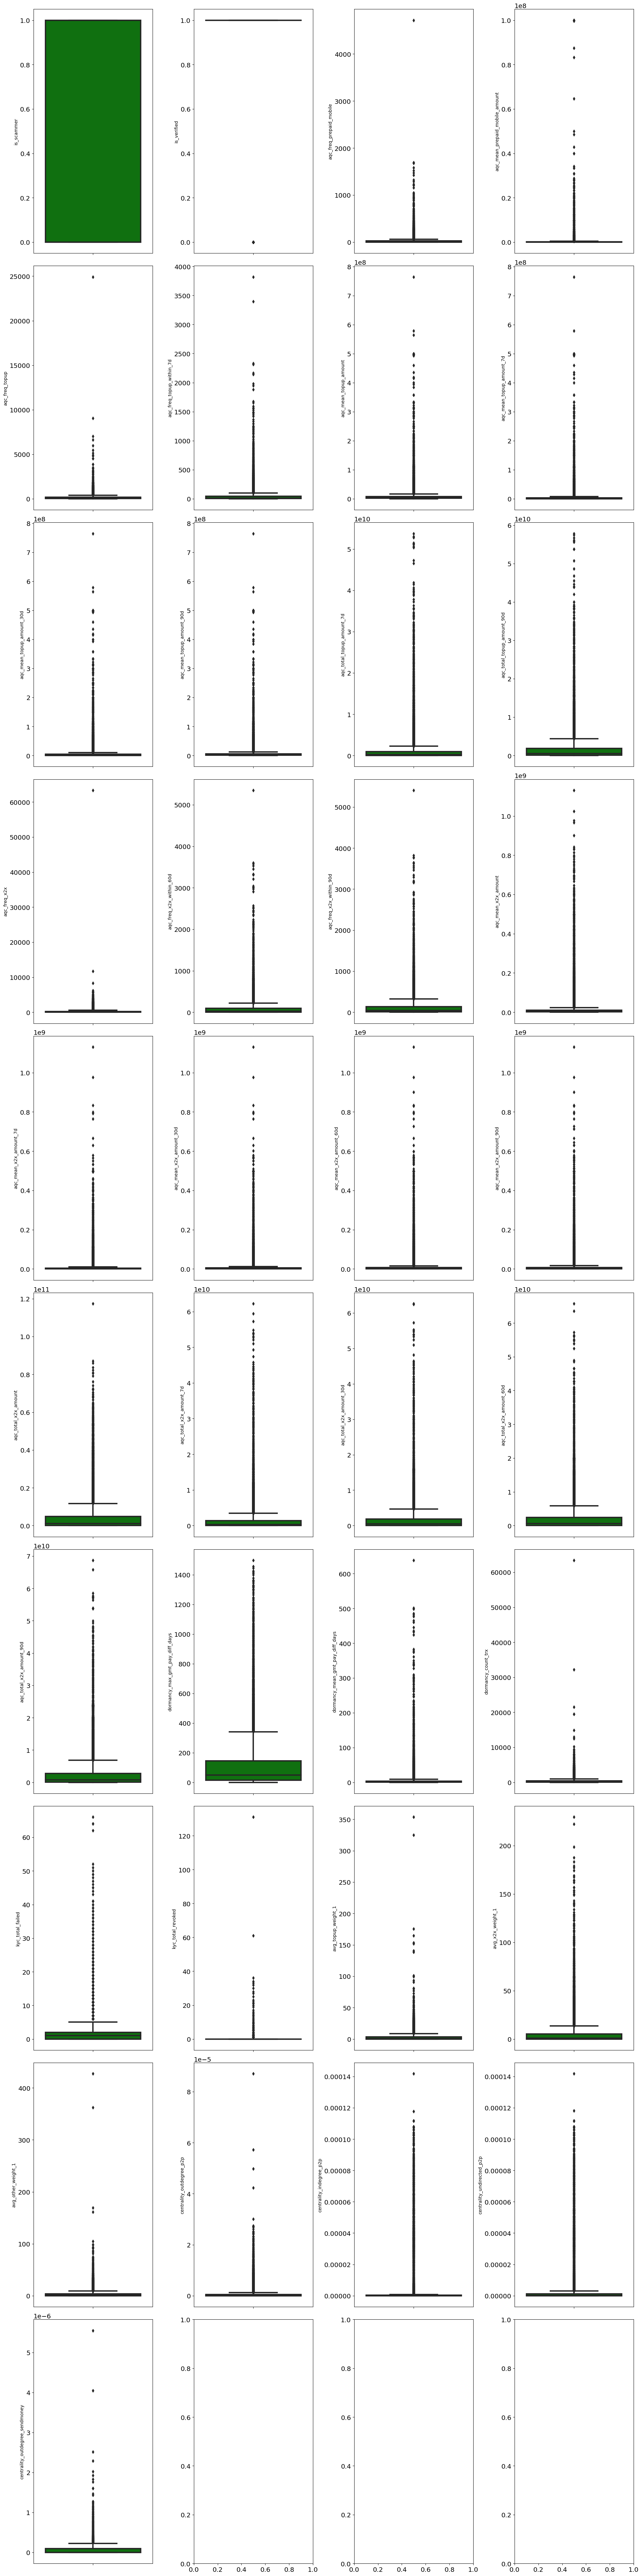

In [ ]:
import math

# Define the list of numerical features
features = numerical_cols

# Calculate the number of rows and columns needed for the subplot grid
num_cols = 4
num_rows = math.ceil(len(features) / num_cols)

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 8*num_rows))

# Loop over the features and create a boxplot for each one
for i, feature in enumerate(features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx][col_idx]
    sns.boxplot(y=df_fraud[feature], color='green', orient='v', ax=ax)

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()


- We can see many outliers in this dataset. In preprocessing stage, we need to remove this outlier

## Analisis Distplot - Distribusi Data pada Variabel-variabel Numerik

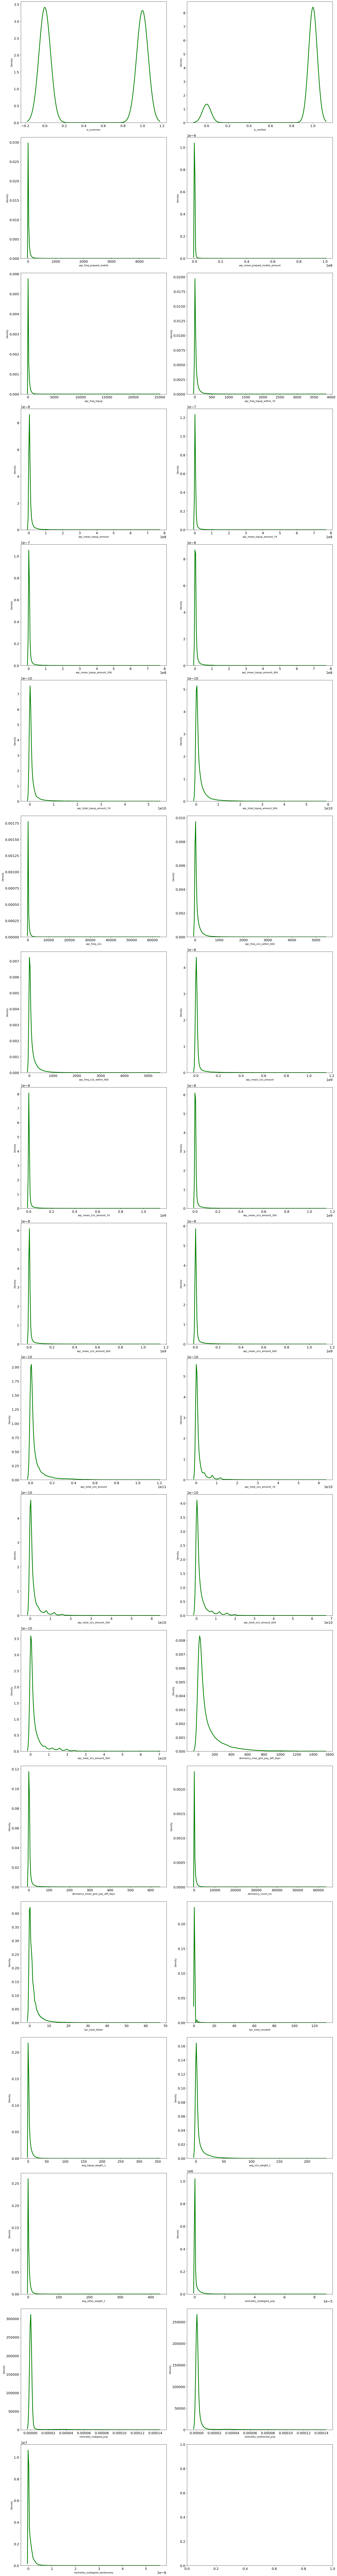

In [ ]:
import math

# Define the list of numerical features
features = numerical_cols

# Calculate the number of rows and columns needed for the subplot grid
num_cols = 2
num_rows = math.ceil(len(features) / num_cols)

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 8*num_rows))

# Loop over the features and create a density plot for each one
for i, feature in enumerate(features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx][col_idx]
    sns.kdeplot(x=df_fraud[feature], color='green', ax=ax)
    ax.set_ylabel("Density")

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()


Almost all the numerical values are right skewed.

<ipython-input-73-e2f2b9a6a1cd>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df_fraud, x=df_fraud[feature], color='green', ax=ax,hue='is_scammer(cat)', fill='True' )


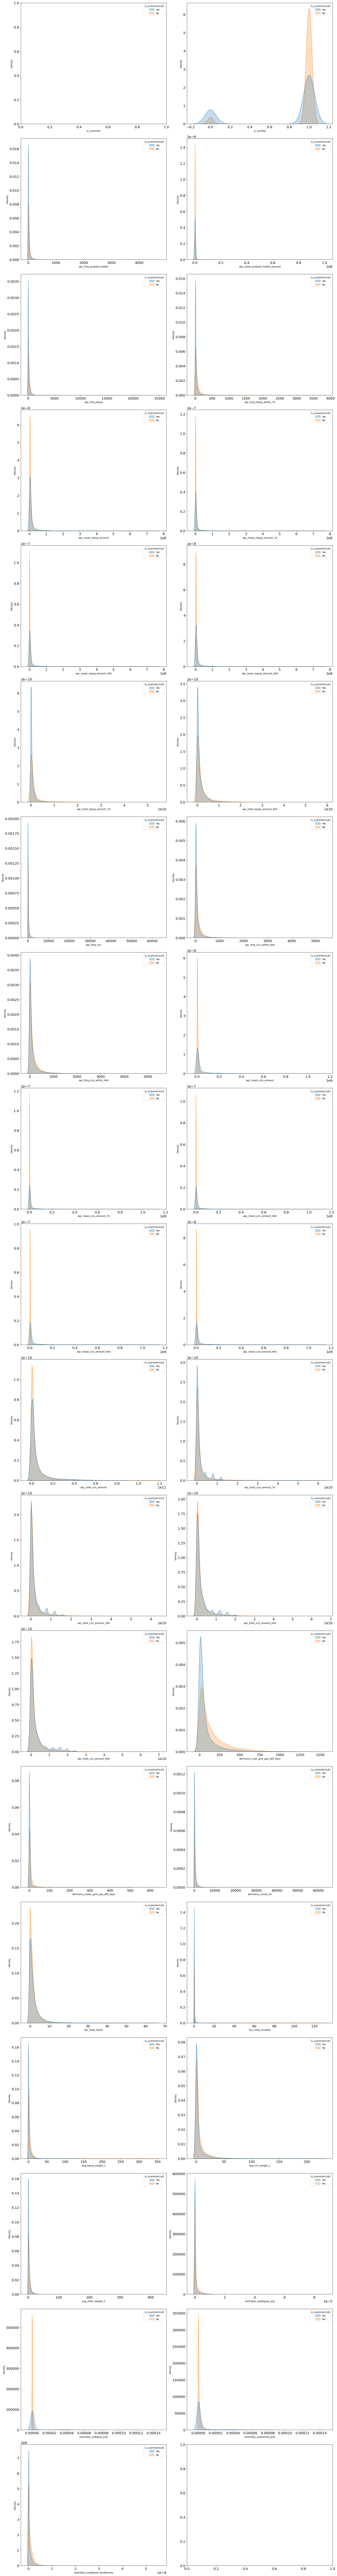

In [ ]:
import math

# Define the list of numerical features
features = numerical_cols

# Calculate the number of rows and columns needed for the subplot grid
num_cols = 2
num_rows = math.ceil(len(features) / num_cols)

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 8*num_rows))

# Loop over the features and create a density plot for each one
for i, feature in enumerate(features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx][col_idx]
    sns.kdeplot(data = df_fraud, x=df_fraud[feature], color='green', ax=ax,hue='is_scammer(cat)', fill='True' )
    ax.set_ylabel("Density")

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()


# KDEplot with Target Hue


- After differentiating scammer and not, we can see that several features are closely to normal distribution.

## Violinplot Analysis - Distribution Numerical Values

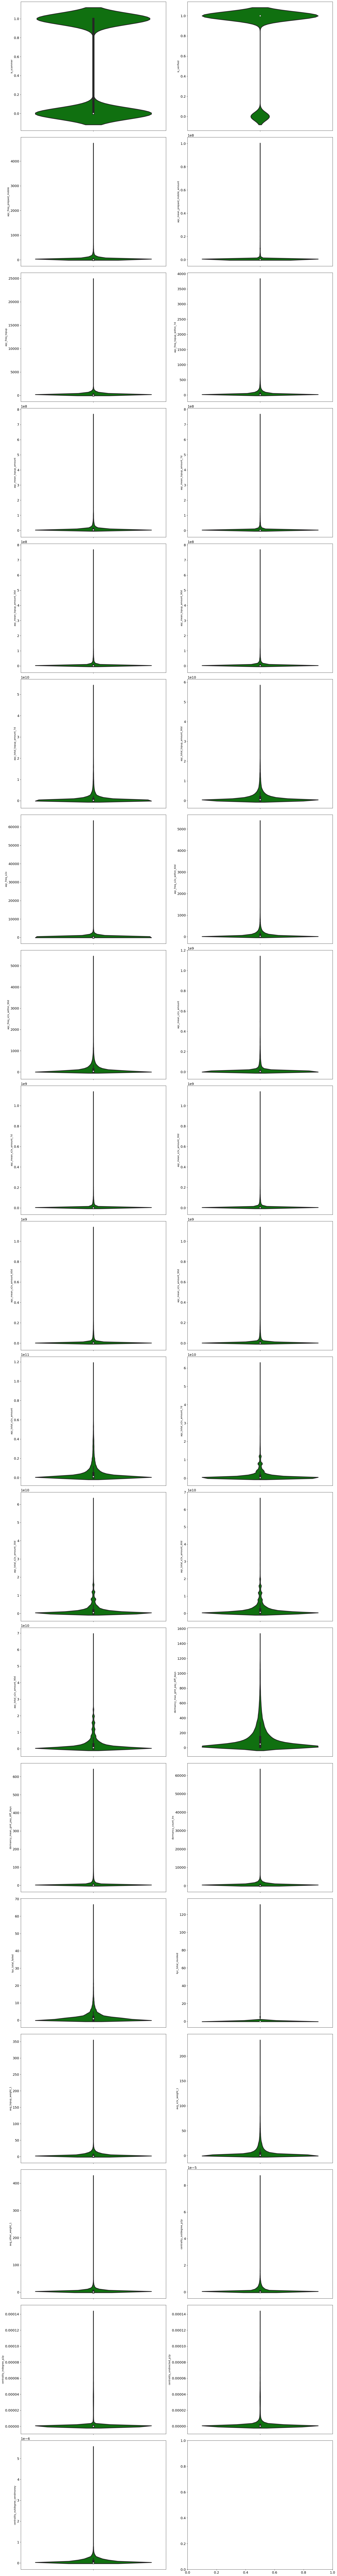

In [ ]:
import math

# Define the list of numerical features
features = numerical_cols

# Calculate the number of rows and columns needed for the subplot grid
num_cols = 2
num_rows = math.ceil(len(features) / num_cols)

# Specify the size of each subplot
height_ratio = 0.6  # 60% of the default height
width_ratio = 0.4  # 40% of the default width

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20*width_ratio*num_cols, 8*height_ratio*num_rows), 
                         gridspec_kw={'height_ratios': [height_ratio]*num_rows, 'width_ratios': [width_ratio]*num_cols})

# Loop over the features and create a violin plot for each one
for i, feature in enumerate(features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx][col_idx]
    sns.violinplot(y=df_fraud[feature], color='green', ax=ax, orient='v')

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()


Violin Plot is the combination of boxplot and distplot. Here, we can see the outliers.

# Multivariate Analysis

In [ ]:
#Buat data frame baru dimana variabel `ID` untuk sementara di drop
df_fraudcorr = df_fraud.drop(['uid'], axis=1)

## Correlation Heatmap

In [ ]:
df_fraudcorr.corr()

<ipython-input-77-4be391d446d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fraudcorr.corr()


is_scammer  is_verified  \
is_scammer                         1.000000    -0.251413   
is_verified                       -0.251413     1.000000   
aqc_freq_prepaid_mobile           -0.083324     0.107495   
aqc_mean_prepaid_mobile_amount     0.044900    -0.128481   
aqc_freq_topup                    -0.096824     0.168482   
aqc_freq_topup_within_7d          -0.176974     0.130996   
aqc_mean_topup_amount              0.131478     0.040460   
aqc_mean_topup_amount_7d           0.111392     0.001978   
aqc_mean_topup_amount_30d          0.131155     0.005736   
aqc_mean_topup_amount_90d          0.145909     0.016104   
aqc_total_topup_amount_7d         -0.169068     0.129160   
aqc_total_topup_amount_90d        -0.125448     0.165859   
aqc_freq_x2x                      -0.029249     0.158973   
aqc_freq_x2x_within_60d           -0.111257     0.180031   
aqc_freq_x2x_within_90d           -0.066025     0.197775   
aqc_mean_x2x_amount                0.219635     0.120295   
aqc_mean_x2x_amount_7d             0.172587     0.096115   
aqc_mean_x2x_amount_30d            0.192482     0.103249   
aqc_mean_x2x_amount_60d            0.207708     0.108970   
aqc_mean_x2x_amount_90d            0.215319     0.112045   
aqc_total_x2x_amount               0.091340     0.202000   
aqc_total_x2x_amount_7d           -0.027341     0.171257   
aqc_total_x2x_amount_30d           0.009174     0.189802   
aqc_total_x2x_amount_60d           0.050470     0.202792   
aqc_total_x2x_amount_90d           0.075329     0.207055   
dormancy_max_gmt_pay_diff_days    -0.213872     0.091600   
dormancy_mean_gmt_pay_diff_days   -0.138489    -0.061836   
dormancy_count_trx                -0.028576     0.155276   
kyc_total_failed                   0.035219    -0.157187   
kyc_total_revoked                 -0.013080    -0.066987   
avg_topup_weight_1                -0.090458     0.138103   
avg_x2x_weight_1                  -0.058140     0.172888   
avg_other_weight_1                -0.085030     0.093771   
centrality_outdegree_p2p          -0.090244     0.140981   
centrality_indegree_p2p            0.195156     0.076590   
centrality_undirected_p2p          0.172402     0.100617   
centrality_outdegree_sendmoney    -0.150049     0.203016   

                                 aqc_freq_prepaid_mobile  \
is_scammer                                     -0.083324   
is_verified                                     0.107495   
aqc_freq_prepaid_mobile                         1.000000   
aqc_mean_prepaid_mobile_amount                  0.036413   
aqc_freq_topup                                  0.336191   
aqc_freq_topup_within_7d                        0.221912   
aqc_mean_topup_amount                          -0.052089   
aqc_mean_topup_amount_7d                       -0.059061   
aqc_mean_topup_amount_30d                      -0.065262   
aqc_mean_topup_amount_90d                      -0.068236   
aqc_total_topup_amount_7d                       0.191314   
aqc_total_topup_amount_90d                      0.229153   
aqc_freq_x2x                                    0.251177   
aqc_freq_x2x_within_60d                         0.223022   
aqc_freq_x2x_within_90d                         0.241479   
aqc_mean_x2x_amount                            -0.081349   
aqc_mean_x2x_amount_7d                         -0.075845   
aqc_mean_x2x_amount_30d                        -0.081812   
aqc_mean_x2x_amount_60d                        -0.085707   
aqc_mean_x2x_amount_90d                        -0.087247   
aqc_total_x2x_amount                            0.166230   
aqc_total_x2x_amount_7d                         0.128165   
aqc_total_x2x_amount_30d                        0.128256   
aqc_total_x2x_amount_60d                        0.123729   
aqc_total_x2x_amount_90d                        0.121155   
dormancy_max_gmt_pay_diff_days                 -0.037352   
dormancy_mean_gmt_pay_diff_days                -0.078384   
dormancy_count_trx                              0.376302   
kyc_total_fa

<Axes: >

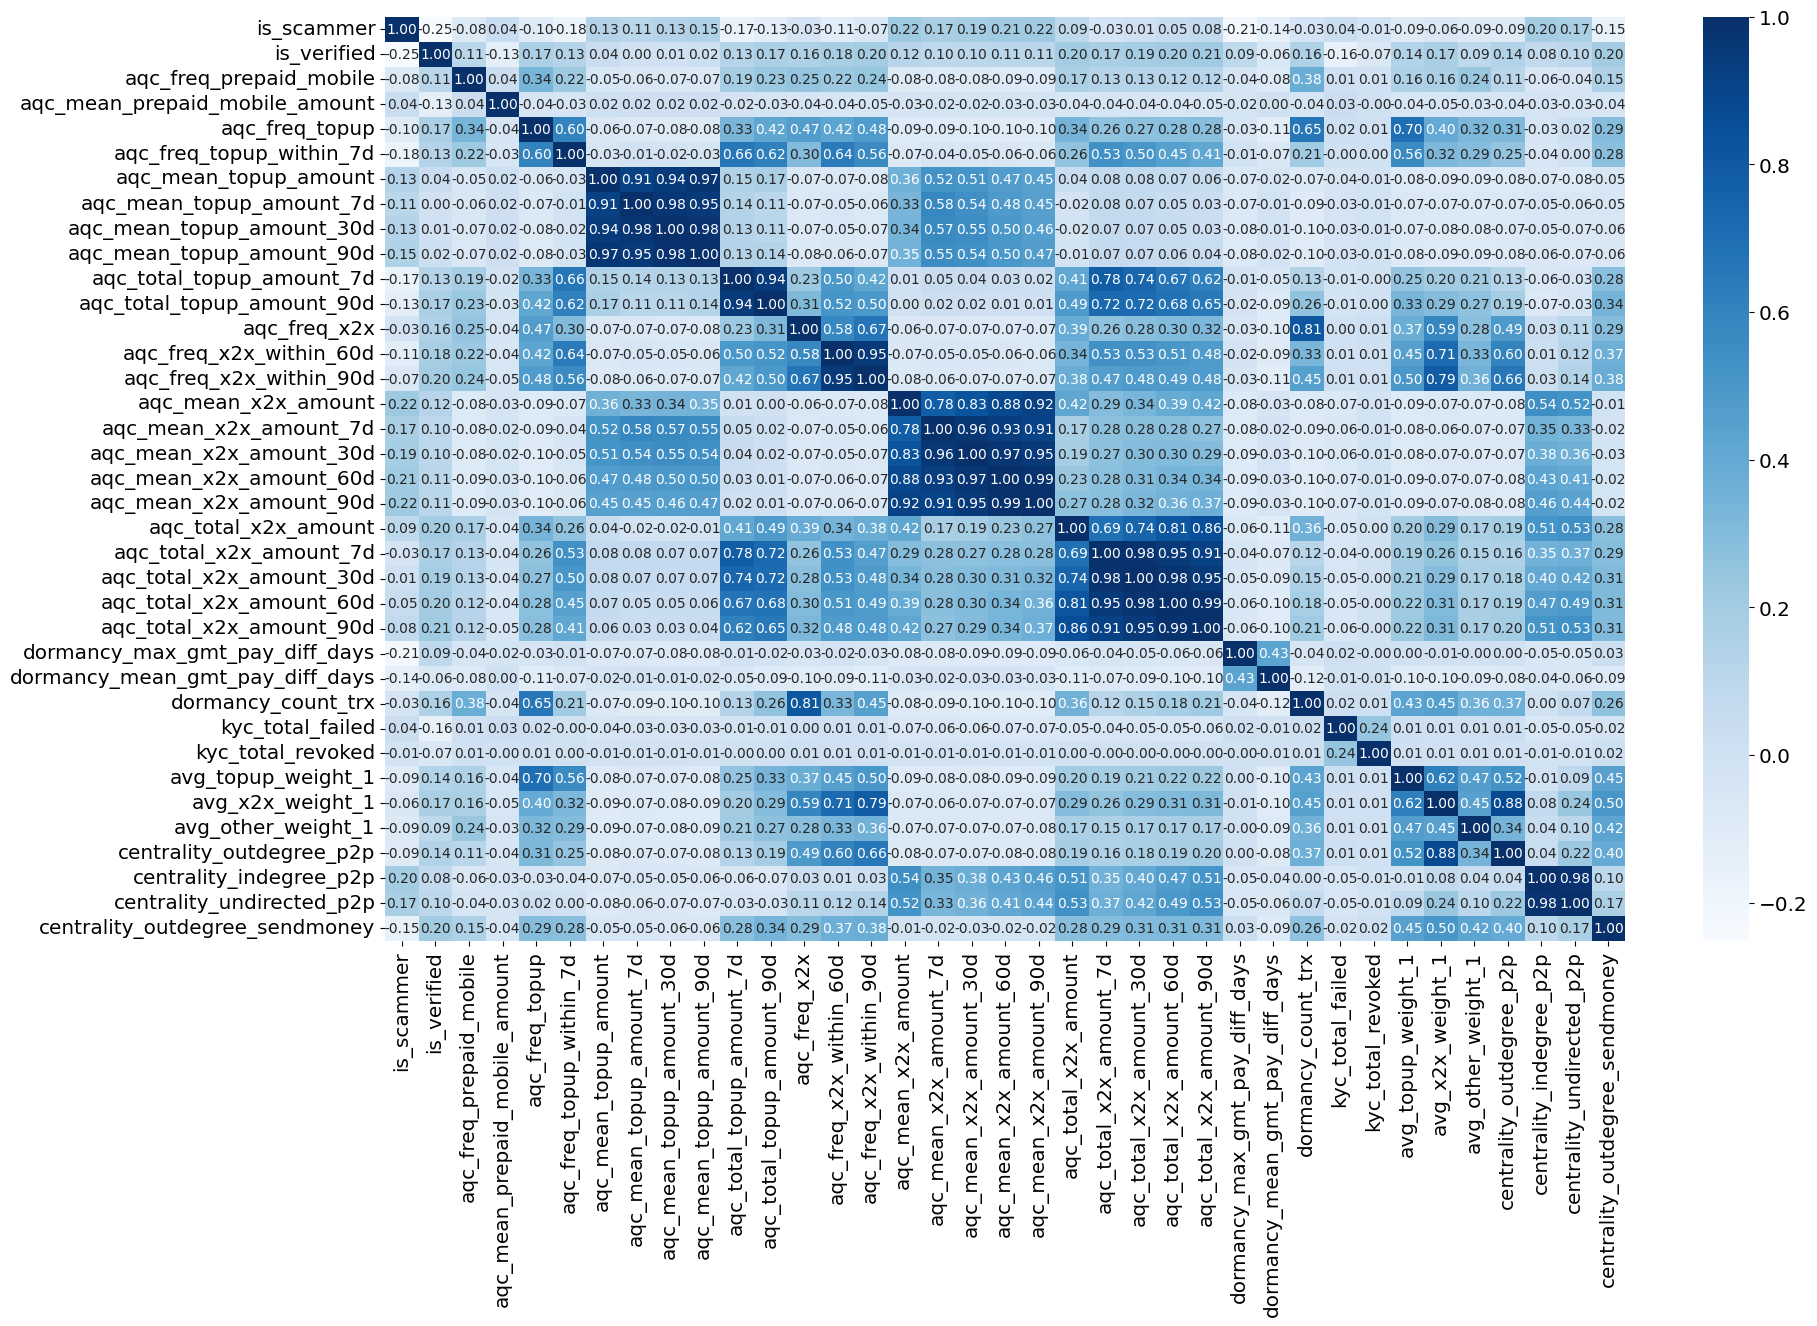

In [ ]:
# correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df_fraudcorr.corr(numeric_only=True), cmap='Blues', annot=True, fmt='.2f')


- There are many redundant features because they have high correlation (0.7). In the later stage, we can drop these features from our data frame

## Pair Plot (Will be done after removing several columns)

In [ ]:
# # Pair Plot
# plt.figure(figsize=(20, 12))
# sns.pairplot(df_fraudcorr, diag_kind='kde')

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f26d68e9d80> (for post_execute):



KeyboardInterrupt



<Figure size 2000x1200 with 0 Axes>

Error in callback <function flush_figures at 0x7f26d68e9000> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# # di sini kita juga hanya menggunakan sample dari full dataset
# plt.figure(figsize=(15, 15))
# sns.pairplot(df_shippingcorr, diag_kind='kde', hue='Late_Shipment(cat)')

## Kendall

In [ ]:
corr = df_fraudcorr.corr(method='kendall',numeric_only=True)

<Axes: >

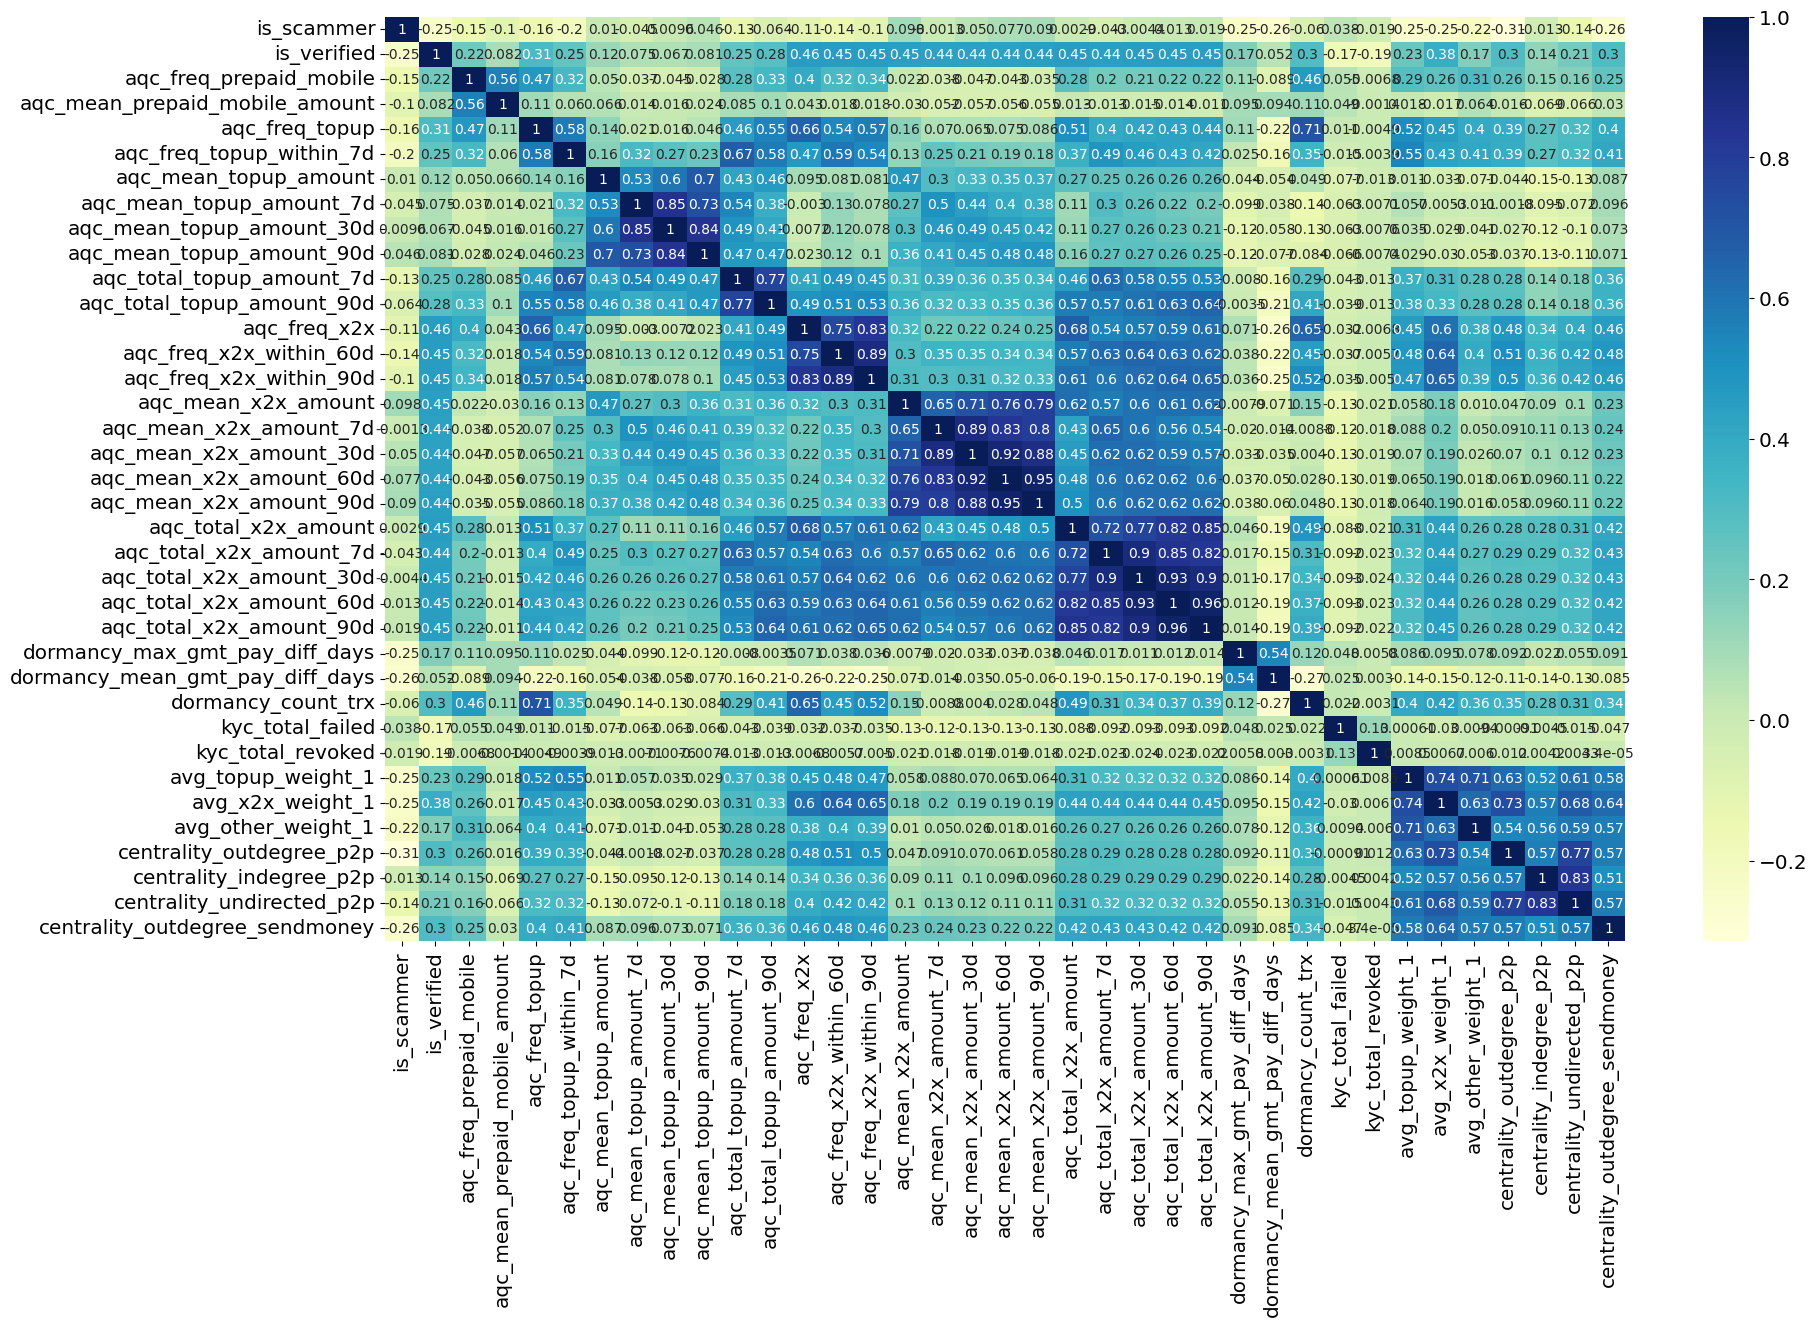

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

# Business Insights

## 1. Data Preprocessing
Several data preprocessing steps will be performed, such as 
1. checking and handling data duplication, 
2. checking and handling null values (categorical & numerical).
3. fixing the 'job_position' column so that there are no duplicate categories

### 2.1 Checking and handling data duplication

In [ ]:
# checking number of rows
num_rows = df_fraud.shape[0]

print("Number of rows:", num_rows)

Number of rows: 42859


In [ ]:
# checking data duplication
df_fraud.duplicated().sum()

73

There are 73 instances of data duplication that need to be handled

In [ ]:
duplicates = df_fraud[df_fraud.duplicated()]

In [ ]:
if not duplicates.empty:
  df_fraud.drop_duplicates(inplace=True)

In [ ]:
# checking data duplication
df_fraud.duplicated().sum()

0

In [ ]:
# checking number of rows
num_rows = df_fraud.shape[0]

print("Number of rows:", num_rows)

Number of rows: 42786


In [ ]:
# checking data loss percentage
duplicate_percentage = (73/42859) * 100

print("duplicate row percentage that has been dropped = ", duplicate_percentage, "%")

duplicate row percentage that has been dropped =  0.1703259525420565 %


The 73 duplicated rows can be dropped as they do not significantly affect the entire dataset, which is 0.17%, which is less than 5%.

### 2.2 .Checking and handling null values (categorical & numerical).

In [ ]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42786 entries, 0 to 398331
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uid                              42786 non-null  object 
 1   is_scammer                       42786 non-null  int64  
 2   source                           42786 non-null  object 
 3   trx_date                         42786 non-null  object 
 4   report_date                      42786 non-null  object 
 5   registereddate                   42695 non-null  object 
 6   birthday                         36890 non-null  object 
 7   gender                           37179 non-null  object 
 8   job_position                     36890 non-null  object 
 9   is_verified                      42786 non-null  int64  
 10  aqc_freq_prepaid_mobile          42786 non-null  int64  
 11  aqc_mean_prepaid_mobile_amount   42786 non-null  float64
 12  aqc_freq_topup   

some of the feature has null values because the account is not yet verified, hence the data is not complete, therefore we need to handle these null values.

In [ ]:
# check columns that has null values

null_cols = df_fraud.columns[df_fraud.isnull().any()]
null_df = pd.DataFrame({'Column': null_cols, 'Data Type': df_fraud[null_cols].dtypes.values, 'Number of Null Values': df_fraud[null_cols].isnull().sum().values})
print(tabulate(null_df, headers='keys', tablefmt='psql'))

+----+---------------------------------+-------------+-------------------------+
|    | Column                          | Data Type   |   Number of Null Values |
|----+---------------------------------+-------------+-------------------------|
|  0 | registereddate                  | object      |                      91 |
|  1 | birthday                        | object      |                    5896 |
|  2 | gender                          | object      |                    5607 |
|  3 | job_position                    | object      |                    5896 |
|  4 | dormancy_max_gmt_pay_diff_days  | float64     |                     509 |
|  5 | dormancy_mean_gmt_pay_diff_days | float64     |                     509 |
|  6 | kyc_total_failed                | float64     |                    3508 |
|  7 | kyc_total_revoked               | float64     |                    3508 |
+----+---------------------------------+-------------+-------------------------+


In [ ]:
# checking data null percentage
max_null_percentage = (5896/42786) * 100

print("null values row percentage = ", max_null_percentage, "%")

null values row percentage =  13.780208479409154 %


Due to the fact that the percentage of null data is significant (>5%), simply dropping the rows is not a viable solution as it could lead to the loss of valuable information. Therefore, we will handle the null values by imputing the median for numerical features and the mode for categorical features. This approach allows us to retain the data while also reducing the impact of the missing values on our analysis.

In [ ]:
# impute null values in numerical features with median
num_imputer = SimpleImputer(strategy='median')
num_cols = df_fraud.select_dtypes(include=['float64']).columns.tolist()
df_fraud[num_cols] = num_imputer.fit_transform(df_fraud[num_cols])

# impute null values in categorical features with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_cols = df_fraud.select_dtypes(include=['object']).columns.tolist()
df_fraud[cat_cols] = cat_imputer.fit_transform(df_fraud[cat_cols])

In [ ]:
# check columns that has null values

null_cols = df_fraud.columns[df_fraud.isnull().any()]
null_df = pd.DataFrame({'Column': null_cols, 'Data Type': df_fraud[null_cols].dtypes.values, 'Number of Null Values': df_fraud[null_cols].isnull().sum().values})
print(tabulate(null_df, headers='keys', tablefmt='psql'))

+----------+-------------+-------------------------+
| Column   | Data Type   | Number of Null Values   |
|----------+-------------+-------------------------|
+----------+-------------+-------------------------+


All null values have been handled appropriately based on their respective data types. As a result, there are no remaining null values in our data.

## 2. Exploratory Data Analysis
Beberapa hal yang ingin diketahui <br>
1. Apakah hubungan antara ... dengan ...
2. .